In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a", "na", "--", "?"]
df = pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Final Project/Datasets/germancredit.csv',  delimiter=',', na_values = missing_values)

df



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


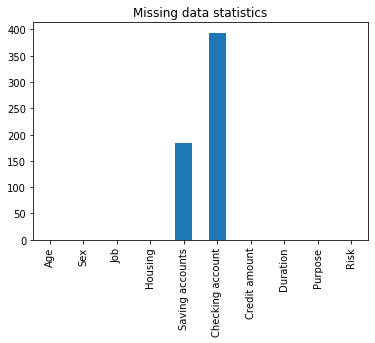

In [4]:
c = df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='bar')
print(c)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [5]:
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('no_accounts', inplace=True)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


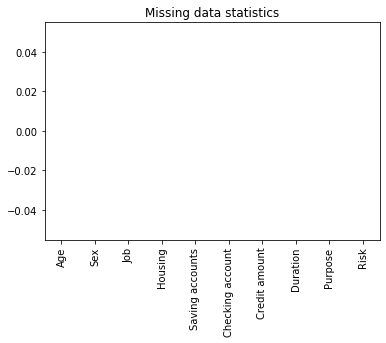

In [6]:
c = df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='bar')
print(c)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
# getting dummies for all the categorical variables
dummies_columns = ['Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df = df.merge(pd.get_dummies(df[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
df['Risk'] = df['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Purpose','Sex','Housing','Saving accounts','Checking account']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()


,Age,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_no_accounts,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_no_accounts,Checking account_rich
0,67,2,1169,6,0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
1,22,2,5951,48,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,45,2,7882,42,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53,2,4870,24,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1000 non-null   int64
 1   Job                           1000 non-null   int64
 2   Credit amount                 1000 non-null   int64
 3   Duration                      1000 non-null   int64
 4   Risk                          1000 non-null   int64
 5   Purpose_car                   1000 non-null   uint8
 6   Purpose_domestic appliances   1000 non-null   uint8
 7   Purpose_education             1000 non-null   uint8
 8   Purpose_furniture/equipment   1000 non-null   uint8
 9   Purpose_radio/TV              1000 non-null   uint8
 10  Purpose_repairs               1000 non-null   uint8
 11  Purpose_vacation/others       1000 non-null   uint8
 12  Sex_male                      1000 non-null   uint8
 13  Housing_own                   1000

In [16]:
x= df.drop(['Risk'], axis=1)
x
y = df['Risk']
print(x)


     Age  Job  Credit amount  Duration  Purpose_car  \
0     67    2           1169         6            0   
1     22    2           5951        48            0   
2     49    1           2096        12            0   
3     45    2           7882        42            0   
4     53    2           4870        24            1   
..   ...  ...            ...       ...          ...   
995   31    1           1736        12            0   
996   40    3           3857        30            1   
997   38    2            804        12            0   
998   23    2           1845        45            0   
999   27    2           4576        45            1   

     Purpose_domestic appliances  Purpose_education  \
0                              0                  0   
1                              0                  0   
2                              0                  1   
3                              0                  0   
4                              0                  0   
..       

In [17]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc

In [18]:
def sampling_modeling(sampler, model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    
        #sampler_nearmiss = NearMiss()
        sampled_x, sampled_y = sampler.fit_resample(X_train, y_train)
    #construct_pipeline = make_pipeline(sampler, model)
        model.fit(sampled_x,sampled_y)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}, {1}'.format(sampler, model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [19]:
def modelling_without_sampling(model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}'.format(model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [20]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(y_test, pred_values)
    recal = recall_score(y_test, pred_values)
    precis = precision_score(y_test, pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(y_test, pred_values)
    _val = f1_score(y_test, pred_values)
    gmean = geometric_mean_score(y_test, pred_values)
    return acc, recal, precis, aucroc, gmean, _val
    
    
   


# Resampling and Modelling with balanced data

In [21]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.575, 0.625, 0.62, 0.585, 0.625]
Avg accuracy : 0.606
Recall : [0.7627118644067796, 0.7857142857142857, 0.7796610169491526, 0.746031746031746, 0.7777777777777778]
Avg recall : 0.7703793381759484
Precision : [0.3879310344827586, 0.411214953271028, 0.42201834862385323, 0.41228070175438597, 0.44545454545454544]
Avg precision : 0.4157799167173143
F1_score : [0.5142857142857143, 0.5398773006134969, 0.5476190476190477, 0.5310734463276836, 0.5664739884393064]
Avg f-score : 0.5398658994570498
AUC_ROC : [0.6295828825579998, 0.6741071428571428, 0.6664262531554274, 0.6284903255706176, 0.6662611516626115]
Avg AUC_ROC : 0.6529735511607597
Geometric mean : [0.615346471674249, 0.6648039453209388, 0.6567357453065586, 0.617401088282035, 0.6568622110569915]
Avg gmean : 0.6422298923281546


In [22]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_random = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.645, 0.62, 0.64, 0.635, 0.615]
Avg accuracy : 0.631
Recall : [0.5932203389830508, 0.6964285714285714, 0.711864406779661, 0.6666666666666666, 0.6507936507936508]
Avg recall : 0.66379472693032
Precision : [0.4268292682926829, 0.3979591836734694, 0.4329896907216495, 0.44680851063829785, 0.4270833333333333]
Avg precision : 0.42633399733188665
F1_score : [0.49645390070921985, 0.5064935064935066, 0.5384615384615384, 0.535031847133758, 0.5157232704402516]
Avg f-score : 0.5184328126476548
AUC_ROC : [0.6299435028248589, 0.6433531746031745, 0.6608967423969226, 0.643552311435523, 0.624666898389526]
Avg AUC_ROC : 0.640482525930001
Geometric mean : [0.6288721857330792, 0.6411601278337647, 0.6589285251817779, 0.6431370803617632, 0.6241202822793088]
Avg gmean : 0.6392436402779389


In [23]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_smt = SMOTE(random_state=0)
sampling_modeling(sampler_smt, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.74, 0.695, 0.73, 0.765, 0.755]
Avg accuracy : 0.737
Recall : [0.5423728813559322, 0.5714285714285714, 0.5254237288135594, 0.5714285714285714, 0.5396825396825397]
Avg recall : 0.5500672585418348
Precision : [0.5614035087719298, 0.463768115942029, 0.543859649122807, 0.6428571428571429, 0.6296296296296297]
Avg precision : 0.5683036092647077
F1_score : [0.5517241379310345, 0.5119999999999999, 0.5344827586206897, 0.6050420168067226, 0.5811965811965812]
Avg f-score : 0.5568890989110056
AUC_ROC : [0.6825339584084625, 0.6572420634920635, 0.6705132828464959, 0.7127215849843586, 0.6968485691113427]
Avg AUC_ROC : 0.6839718917685446
Geometric mean : [0.6679876322658972, 0.6516158182573337, 0.6546274389178235, 0.6985759386229535, 0.6788937821678075]
Avg gmean : 0.6703401220463631


In [24]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.705, 0.725, 0.71, 0.74, 0.725]
Avg accuracy : 0.721
Recall : [0.4576271186440678, 0.5714285714285714, 0.5084745762711864, 0.5714285714285714, 0.5238095238095238]
Avg recall : 0.5265536723163841
Precision : [0.5, 0.5079365079365079, 0.5084745762711864, 0.5901639344262295, 0.5689655172413793]
Avg precision : 0.5351081071750607
F1_score : [0.4778761061946903, 0.5378151260504201, 0.5084745762711864, 0.5806451612903226, 0.5454545454545455]
Avg f-score : 0.530053103052233
AUC_ROC : [0.6330688784709702, 0.6780753968253969, 0.6514004087029691, 0.694473409801877, 0.6706638859923532]
Avg AUC_ROC : 0.6655363959587132
Geometric mean : [0.6082732887422654, 0.6696362433535825, 0.6355271031844961, 0.6834861261734088, 0.6543881449737904]
Avg gmean : 0.6502621812855087


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_smote = SMOTE(random_state=0)
sampling_modeling(sampler_smote, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.745, 0.71, 0.73, 0.72, 0.725]
Avg accuracy : 0.7260000000000001
Recall : [0.559322033898305, 0.48214285714285715, 0.559322033898305, 0.4603174603174603, 0.49206349206349204]
Avg recall : 0.5106335754640839
Precision : [0.5689655172413793, 0.48214285714285715, 0.5409836065573771, 0.5686274509803921, 0.5740740740740741]
Avg precision : 0.546958701199216
F1_score : [0.5641025641025641, 0.48214285714285715, 0.55, 0.5087719298245614, 0.5299145299145299]
Avg f-score : 0.5269863761969026
AUC_ROC : [0.6910085346796488, 0.6403769841269842, 0.6803702368073085, 0.6498667593558104, 0.66209014019233]
Avg AUC_ROC : 0.6647425310324164
Geometric mean : [0.678344647293749, 0.6205196554962162, 0.6695154902657099, 0.6216090959354543, 0.6398861560199373]
Avg gmean : 0.6459750090022134


In [26]:
model = RandomForestClassifier(random_state=0)
sampler_ADASYN = ADASYN(random_state=0)
sampling_modeling(sampler_ADASYN, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.73, 0.745, 0.71, 0.7, 0.715]
Avg accuracy : 0.72
Recall : [0.5423728813559322, 0.5892857142857143, 0.5254237288135594, 0.4444444444444444, 0.4603174603174603]
Avg recall : 0.5123688458434221
Precision : [0.5423728813559322, 0.5409836065573771, 0.5081967213114754, 0.5283018867924528, 0.5576923076923077]
Avg precision : 0.5355094807419091
F1_score : [0.5423728813559322, 0.5641025641025642, 0.5166666666666667, 0.48275862068965514, 0.5043478260869565]
Avg f-score : 0.522049711780355
AUC_ROC : [0.6754417598269022, 0.697420634920635, 0.6563288856833753, 0.6309813463098135, 0.646217124319314]
Avg AUC_ROC : 0.6612779502120081
Geometric mean : [0.6622040807036309, 0.6889864882219251, 0.6431418553377397, 0.6027781048059181, 0.618900546685428]
Avg gmean : 0.6432022151509283


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), RandomForestClassifier(random_state=0)
Accuracy : [0.625, 0.615, 0.635, 0.55, 0.63]
Avg accuracy : 0.611
Recall : [0.7796610169491526, 0.6964285714285714, 0.7796610169491526, 0.746031746031746, 0.7936507936507936]
Avg recall : 0.7590866290018832
Precision : [0.42592592592592593, 0.3939393939393939, 0.4339622641509434, 0.3884297520661157, 0.45045045045045046]
Avg precision : 0.4185415573065659
F1_score : [0.5508982035928144, 0.503225806451613, 0.5575757575757576, 0.5108695652173914, 0.5747126436781609]
Avg f-score : 0.5394563953031475
AUC_ROC : [0.6699723524462076, 0.6398809523809523, 0.6770645510277677, 0.6029428803151431, 0.6741976595991194]
Avg AUC_ROC : 0.652811679153838
Geometric mean : [0.6609321825436144, 0.6373774391990981, 0.6692461217212058, 0.5857181006513773, 0.6635310339194113]
Avg gmean : 0.6433609756069414


In [28]:
from imblearn.under_sampling import RandomUnderSampler
model = RandomForestClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.665, 0.66, 0.66, 0.635, 0.67]
Avg accuracy : 0.658
Recall : [0.6949152542372882, 0.6607142857142857, 0.711864406779661, 0.7301587301587301, 0.6984126984126984]
Avg recall : 0.6992130750605327
Precision : [0.45555555555555555, 0.43023255813953487, 0.45161290322580644, 0.45098039215686275, 0.4835164835164835]
Avg precision : 0.4543795785188486
F1_score : [0.5503355704697986, 0.5211267605633803, 0.5526315789473685, 0.5575757575757576, 0.5714285714285714]
Avg f-score : 0.5506196477969754
AUC_ROC : [0.6736987618704171, 0.6602182539682538, 0.6750811395600432, 0.6606998030355695, 0.6776735024910208]
Avg AUC_ROC : 0.6694742921850608
Geometric mean : [0.6733645982655901, 0.6602180676302314, 0.6740782864343999, 0.6570385735815971, 0.6773560819325163]
Avg gmean : 0.6684111215688671


In [29]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.695, 0.655, 0.645, 0.685, 0.67]
Avg accuracy : 0.67
Recall : [0.6949152542372882, 0.6785714285714286, 0.7457627118644068, 0.7619047619047619, 0.5873015873015873]
Avg recall : 0.6936911487758946
Precision : [0.4880952380952381, 0.42696629213483145, 0.44, 0.5, 0.4805194805194805]
Avg precision : 0.46711620214991
F1_score : [0.5734265734265734, 0.5241379310344828, 0.5534591194968553, 0.6037735849056604, 0.5285714285714287]
Avg f-score : 0.5566737274870001
AUC_ROC : [0.694975357615098, 0.6622023809523809, 0.6742997956485154, 0.7057698992005561, 0.6476653921909397]
Avg AUC_ROC : 0.676982565121498
Geometric mean : [0.6949753550161454, 0.6620000359660472, 0.670502249077175, 0.7035339563992226, 0.6448462384949795]
Avg gmean : 0.6751715669907139


In [30]:
model = AdaBoostClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), AdaBoostClassifier(random_state=0)
Accuracy : [0.585, 0.615, 0.62, 0.565, 0.615]
Avg accuracy : 0.6
Recall : [0.7966101694915254, 0.7142857142857143, 0.864406779661017, 0.8095238095238095, 0.7142857142857143]
Avg recall : 0.7798224374495561
Precision : [0.3983050847457627, 0.39603960396039606, 0.42857142857142855, 0.40476190476190477, 0.4326923076923077]
Avg precision : 0.41207406594636
F1_score : [0.5310734463276836, 0.5095541401273885, 0.5730337078651685, 0.5396825396825397, 0.5389221556886228]
Avg f-score : 0.5384531979382806
AUC_ROC : [0.6465320351003727, 0.6453373015873016, 0.6910686380574588, 0.6310392770246784, 0.6418143899895725]
Avg AUC_ROC : 0.6511583283518767
Geometric mean : [0.6288721857330792, 0.641643475152946, 0.6689766447134129, 0.6052717082487794, 0.6377096661902267]
Avg gmean : 0.6364947360076888


In [31]:
model = AdaBoostClassifier(random_state=0)
sampler_smt1 = SMOTE(random_state=0)
sampling_modeling(sampler_smt1, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.705, 0.72, 0.725, 0.71, 0.72]
Avg accuracy : 0.716
Recall : [0.4915254237288136, 0.625, 0.6271186440677966, 0.5238095238095238, 0.5079365079365079]
Avg recall : 0.5550780199085283
Precision : [0.5, 0.5, 0.5285714285714286, 0.5409836065573771, 0.5614035087719298]
Avg precision : 0.5261917087801471
F1_score : [0.49572649572649574, 0.5555555555555556, 0.5736434108527132, 0.5322580645161291, 0.5333333333333333]
Avg f-score : 0.5381033719968453
AUC_ROC : [0.6429258324317828, 0.6909722222222221, 0.6965380454381537, 0.6597149808828642, 0.6627273780558451]
Avg AUC_ROC : 0.6705756918061735
Geometric mean : [0.6248452146353324, 0.6878155841341324, 0.6930701230439706, 0.6455645302670866, 0.6443968995521887]
Avg gmean : 0.659138470326542


In [32]:
model = AdaBoostClassifier(random_state=0)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.685, 0.715, 0.705, 0.725, 0.715]
Avg accuracy : 0.709
Recall : [0.4745762711864407, 0.5535714285714286, 0.5932203389830508, 0.5396825396825397, 0.49206349206349204]
Avg recall : 0.5306228140973903
Precision : [0.4666666666666667, 0.49206349206349204, 0.5, 0.5666666666666667, 0.5535714285714286]
Avg precision : 0.5157936507936508
F1_score : [0.47058823529411764, 0.5210084033613446, 0.5426356589147286, 0.5528455284552845, 0.5210084033613446]
Avg f-score : 0.521617245877364
AUC_ROC : [0.6238129582882558, 0.6656746031746033, 0.6724966943142203, 0.6749507588923647, 0.6547908701193372]
Avg AUC_ROC : 0.6583451769577563
Geometric mean : [0.6056987850006141, 0.6561673228343176, 0.6678076544552033, 0.6612571631378988, 0.6342482826328415]
Avg gmean : 0.645035841612175


# Modelling with Imbalanced data

In [33]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.735, 0.72, 0.73, 0.76, 0.77]
Avg accuracy : 0.7430000000000001
Recall : [0.4576271186440678, 0.48214285714285715, 0.4576271186440678, 0.47619047619047616, 0.49206349206349204]
Avg recall : 0.47313021253699217
Precision : [0.5625, 0.5, 0.5510204081632653, 0.6666666666666666, 0.6888888888888889]
Avg precision : 0.593815192743764
F1_score : [0.5046728971962616, 0.4909090909090909, 0.4999999999999999, 0.5555555555555556, 0.5740740740740741]
Avg f-score : 0.5250423235469964
AUC_ROC : [0.6543454742156509, 0.6473214285714286, 0.6507993749248708, 0.6833507125477929, 0.6949368555207972]
Avg AUC_ROC : 0.666150769156108
Geometric mean : [0.6240752264012066, 0.6258922202972101, 0.6214694729477759, 0.6511933912532873, 0.6646650521583435]
Avg gmean : 0.6374590726115648


In [34]:
model = AdaBoostClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of AdaBoostClassifier(random_state=0)
Accuracy : [0.755, 0.73, 0.75, 0.715, 0.715]
Avg accuracy : 0.7329999999999999
Recall : [0.4067796610169492, 0.42857142857142855, 0.559322033898305, 0.38095238095238093, 0.38095238095238093]
Avg recall : 0.43131557707828894
Precision : [0.631578947368421, 0.5217391304347826, 0.5789473684210527, 0.5714285714285714, 0.5714285714285714]
Avg precision : 0.5750245178162798
F1_score : [0.4948453608247423, 0.47058823529411764, 0.5689655172413793, 0.4571428571428571, 0.4571428571428571]
Avg f-score : 0.4897369655291907
AUC_ROC : [0.6537444404375525, 0.6378968253968254, 0.694554633970429, 0.6247827598192561, 0.6247827598192561]
Avg AUC_ROC : 0.6471522838886639
Geometric mean : [0.6053017356069132, 0.6025738445163696, 0.6812622721445315, 0.575239292215859, 0.575239292215859]
Avg gmean : 0.6079232873399064


In [35]:
model = RandomForestClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of RandomForestClassifier(random_state=0)
Accuracy : [0.745, 0.69, 0.755, 0.705, 0.715]
Avg accuracy : 0.722
Recall : [0.423728813559322, 0.26785714285714285, 0.4406779661016949, 0.31746031746031744, 0.31746031746031744]
Avg recall : 0.3534369114877589
Precision : [0.5952380952380952, 0.4166666666666667, 0.6190476190476191, 0.5555555555555556, 0.5882352941176471]
Avg precision : 0.5549486461251167
F1_score : [0.49504950495049505, 0.32608695652173914, 0.5148514851485149, 0.40404040404040403, 0.41237113402061853]
Avg f-score : 0.4304798969363543
AUC_ROC : [0.6515807188363987, 0.5610119047619047, 0.6636013943983653, 0.6003359981462172, 0.6076352682192099]
Avg AUC_ROC : 0.6168330568724191
Geometric mean : [0.6104432343969127, 0.47832482985638836, 0.625037563482319, 0.5295136069514208, 0.5338718171395691]
Avg gmean : 0.5554382103653219
